In [1]:
import sys
import os
import datetime

import pandas as pd
import numpy as np

import yfinance as yf
from fredapi import Fred

import matplotlib.pyplot as plt



In [2]:
# custom modules that are present in this Git repo, written by me
import yahoo.code.support_functions as sf
import yahoo.code.plot_functions as pf
# I've refactored the initial version of this notebook into a custom module below
import yahoo.code.dislocation_analysis as da
import yahoo.code.ETL as ETL
import yahoo.code.option_strategy as OptS

In [17]:
import importlib
importlib.reload(OptS)

<module 'yahoo.code.option_strategy' from '/Users/lukelee/Documents/Interview/Learning/yahoo/code/option_strategy.py'>

In [20]:
test = OptS.Straddle(ticker="^DJX", trade_date= datetime.date(2025, 6, 17), quantity=7, target_dtox = 60)

#test.set_strike(strike=420.25)
test.build()


ATM Strike of 420.0 selected 

Original ATM strike was 420.0, due to lack of listed contracts the new ATM strike is 415.0
Ticker: '^DJX', Exp: 2025-08-15, Dtox: 59, Premium:  182.70 
Break even points: [np.float64(388.9), np.float64(441.1)] 
Max Profit:  inf, Max Loss: -182.70 
Strike: 415.0


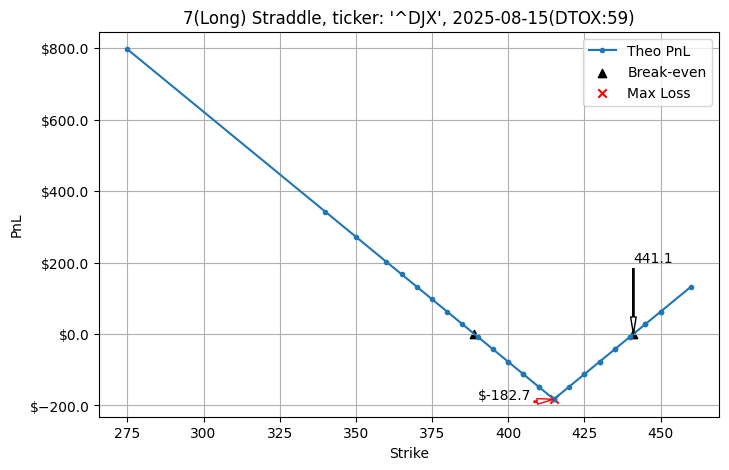

In [21]:
test.plot_theo_pnl()

In [22]:
print(repr(test))

Straddle(ticker='^DJX', trade_date='2025-06-17', quantity=7, target_dtox=60)


In [23]:
test.positions

,contractSymbol,strike,lastPrice,bid,ask,volume,openInterest,impliedVolatility,inTheMoney,put_call_code,Expiration,DTOX,Netquantity
0,DJX250815C00415000,415.0,18.4,16.85,17.25,1.0,30,0.197426,True,C,2025-08-15,59,7.0
1,DJX250815P00415000,415.0,7.7,7.20,7.50,115.0,115,0.158120,False,P,2025-08-15,59,7.0


In [24]:
import importlib
importlib.reload(OptS)

<module 'yahoo.code.option_strategy' from '/Users/lukelee/Documents/Interview/Learning/yahoo/code/option_strategy.py'>

In [25]:
test2 = OptS.Strangle(ticker='^DJX', trade_date='2025-06-17', quantity=7, target_dtox=30)

test2.set_strikes(strikes=[400,415])
test2.select_positions()
test2.calculate_theo_pnl()

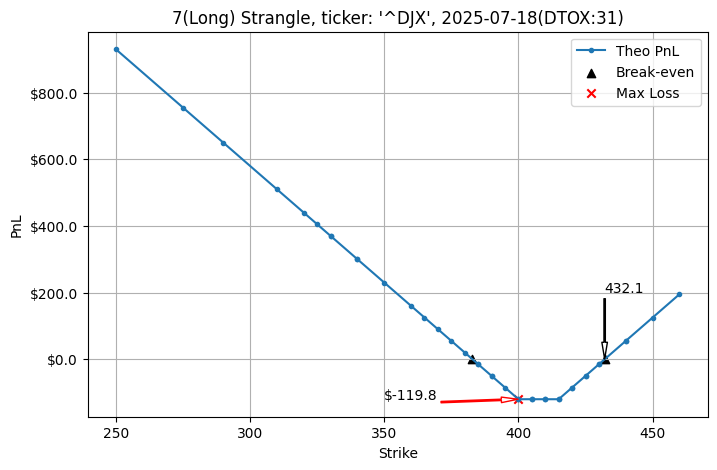

In [26]:
test2.plot_theo_pnl()

In [27]:
print(test2)

Ticker: '^DJX', Exp: 2025-07-18, Dtox: 31, Premium:  119.84 
Break even points: [np.float64(382.88), np.float64(432.12)] 
Max Profit:  inf, Max Loss: -119.84 
Strikes: [400, 415]


In [28]:
print(repr(test2))

Strangle(ticker='^DJX', trade_date='2025-06-17 00:00:00', quantity=7, target_dtox=30)


## Notes on class

The new class I am about to build needs the following


#### Input

- underlying
- strikes
- long/short
- expiration (target)

#### calculation

- max profit
- break even point(s)
- max loss

#### methods

- plot PnL
- backtest
